### Imports 

In [1]:
import nltk
nltk.download('omw-1.4')
  

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dodlaraj\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import re
from pprint import pprint

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

from collections import Counter
from wordcloud import WordCloud


import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dodlaraj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df = pd.read_pickle('./pre-processed.pkl')

In [5]:
df.shape

(98727, 44)

In [6]:
df = df.drop(['tidy_tweet','tidy_tweet_tokens','no_stop_joined','Hashtag','Location'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98727 entries, 0 to 98726
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 98727 non-null  object 
 1   id                         98727 non-null  int64  
 2   id_str                     98727 non-null  int64  
 3   text                       98727 non-null  object 
 4   truncated                  98727 non-null  bool   
 5   entities                   98727 non-null  object 
 6   metadata                   98727 non-null  object 
 7   source                     98727 non-null  object 
 8   in_reply_to_status_id      11204 non-null  float64
 9   in_reply_to_status_id_str  11204 non-null  float64
 10  in_reply_to_user_id        12568 non-null  float64
 11  in_reply_to_user_id_str    12568 non-null  float64
 12  in_reply_to_screen_name    12568 non-null  object 
 13  user                       98727 non-null  obj

In [8]:
df.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,extended_entities,withheld_scope,withheld_in_countries,device,text_tokenized,emoji_count,word_count,character_count,emoji_percent,tokens_no_stop
0,Mon Dec 05 14:14:43 +0000 2022,1599769240004972544,1599769240004972544,RT @iot_automotive: 24h round-up. A collection...,False,"{'hashtags': [{'text': 'AI', 'indices': [95, 9...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,NaN,NaN,NaN,non-standard,"[RT, @, iot_automotive, :, 24h, round-up, ., A...",0,15,140,0.0,"[round, collection, tweets, enjoy]"
1,Mon Dec 05 14:00:55 +0000 2022,1599765764113940483,1599765764113940483,Meet Powderworld: A Lightweight Simulation Env...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://buffer.com"" rel=""nofollow"">Bu...",NaN,NaN,...,NaN,NaN,NaN,non-standard,"[Meet, Powderworld, :, A, Lightweight, Simulat...",0,12,140,0.0,"[meet, powderworld, lightweight, simulation, e..."
2,Mon Dec 05 14:00:04 +0000 2022,1599765552154775557,1599765552154775557,RT @GothamVirtual: #vr #vrgotham #3dvideomotio...,False,"{'hashtags': [{'text': 'vr', 'indices': [19, 2...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,NaN,...,NaN,NaN,NaN,non-standard,"[RT, @, GothamVirtual, :, #, vr, #, vrgotham, ...",0,18,140,0.0,"[gotham, research, paper, investigates, fixed,..."
3,Mon Dec 05 14:00:04 +0000 2022,1599765551378845697,1599765551378845697,RT @lidarnews: This research paper investigate...,False,"{'hashtags': [{'text': 'lidar', 'indices': [74...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,NaN,...,NaN,NaN,NaN,non-standard,"[RT, @, lidarnews, :, This, research, paper, i...",0,17,140,0.0,"[research, paper, investigates, fixed, roadsid..."
4,Mon Dec 05 14:00:04 +0000 2022,1599765550544130048,1599765550544130048,RT @guidaautonoma: American drivers are more l...,False,"{'hashtags': [{'text': 'autonomous', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,NaN,...,NaN,NaN,NaN,non-standard,"[RT, @, guidaautonoma, :, American, drivers, a...",0,22,140,0.0,"[american, drivers, likely, benefit, self, dri..."


### Pre-Processing

#### Remove Links

In [9]:
def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

In [10]:
df['tweet_text_p'] = np.vectorize(remove_links)(df['text'])

In [11]:
def remove_links(tweet):
    tweet_no_link = re.sub(r"twitter.com\S+", "", tweet)
    return tweet_no_link

In [12]:
df['tweet_text_p'] = np.vectorize(remove_links)(df['tweet_text_p'])

### Remove twitter handles

In [13]:
def remove_users(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [14]:
df['tweet_text_p'] = np.vectorize(remove_users)(df['tweet_text_p'], "@ [\w]*", "@[\w]*")

### Remove Hashtag

In [15]:
# We decided to keep hashtags because they add value to the sentiment.
# Example df.tweet_text[20]
def remove_hashtags(tweet, pattern1):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [16]:
df['tweet_text_p'] = np.vectorize(remove_hashtags)(df['tweet_text_p'], "#")

### remove collection of words (electric)

In [17]:
# It adds to the neutrality of the tweet as the compound score is the sum of all words sentiment score. 
# Example df.tweet_text[43]
def remove_word(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, "", tweet)
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [18]:
df['tweet_text_p'] = np.vectorize(remove_word)(df['tweet_text_p'], "electric", "Tesla")

### Remove Duplicates

In [19]:
df.drop_duplicates(subset=['tweet_text_p'], keep='first', inplace=True)

In [20]:
df = df[~df.tweet_text_p.str.contains("Retweeted")]

In [21]:
df.shape

(91311, 40)

### Applying VADER Sentiment Analyzer

In [22]:
# Create an object of Vader Sentiment Analyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [23]:
def is_positive(tweet: str) -> bool:
    """True if tweet has positive compound sentiment, False otherwise."""
    return vader_analyzer.polarity_scores(tweet)["compound"] > 0

In [24]:
df['label'] = df['tweet_text_p'].apply(is_positive)
df

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,withheld_in_countries,device,text_tokenized,emoji_count,word_count,character_count,emoji_percent,tokens_no_stop,tweet_text_p,label
0,Mon Dec 05 14:14:43 +0000 2022,1599769240004972544,1599769240004972544,RT @iot_automotive: 24h round-up. A collection...,False,"{'hashtags': [{'text': 'AI', 'indices': [95, 9...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,NaN,non-standard,"[RT, @, iot_automotive, :, 24h, round-up, ., A...",0,15,140,0.000000,"[round, collection, tweets, enjoy]",RT : 24h round-up. A collection of TOP TWEETS....,True
1,Mon Dec 05 14:00:55 +0000 2022,1599765764113940483,1599765764113940483,Meet Powderworld: A Lightweight Simulation Env...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://buffer.com"" rel=""nofollow"">Bu...",NaN,NaN,...,NaN,non-standard,"[Meet, Powderworld, :, A, Lightweight, Simulat...",0,12,140,0.000000,"[meet, powderworld, lightweight, simulation, e...",Meet Powderworld: A Lightweight Simulation Env...,False
2,Mon Dec 05 14:00:04 +0000 2022,1599765552154775557,1599765552154775557,RT @GothamVirtual: #vr #vrgotham #3dvideomotio...,False,"{'hashtags': [{'text': 'vr', 'indices': [19, 2...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,NaN,...,NaN,non-standard,"[RT, @, GothamVirtual, :, #, vr, #, vrgotham, ...",0,18,140,0.000000,"[gotham, research, paper, investigates, fixed,...",RT : vr vrgotham 3dvideomotion This research p...,True
3,Mon Dec 05 14:00:04 +0000 2022,1599765551378845697,1599765551378845697,RT @lidarnews: This research paper investigate...,False,"{'hashtags': [{'text': 'lidar', 'indices': [74...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,NaN,...,NaN,non-standard,"[RT, @, lidarnews, :, This, research, paper, i...",0,17,140,0.000000,"[research, paper, investigates, fixed, roadsid...",RT : This research paper investigates the use ...,True
4,Mon Dec 05 14:00:04 +0000 2022,1599765550544130048,1599765550544130048,RT @guidaautonoma: American drivers are more l...,False,"{'hashtags': [{'text': 'autonomous', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://robotconsumer.com/"" rel=""nofol...",NaN,NaN,...,NaN,non-standard,"[RT, @, guidaautonoma, :, American, drivers, a...",0,22,140,0.000000,"[american, drivers, likely, benefit, self, dri...",RT : American drivers are more likely to a see...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98722,Fri Oct 21 17:33:17 +0000 2022,1583511757301067776,1583511757301067776,Our #VersiCat #zeroemission #workboat is a Fin...,True,"{'hashtags': [{'text': 'VersiCat', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,iPhone,"[Our, #, VersiCat, #, zeroemission, #, workboa...",2,19,140,1.428571,"[finalist, best, electric, boat, support, proud]",Our VersiCat zeroemission workboat is a Finali...,True
98723,Fri Oct 21 16:01:05 +0000 2022,1583488552117055489,1583488552117055489,⏰ HCD works closely with @CalEnergy to increas...,True,"{'hashtags': [{'text': 'zeroemission', 'indice...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,iPhone,"[⏰, HCD, works, closely, with, @, CalEnergy, t...",2,21,140,1.428571,"[works, closely, increase, access, reliability...",⏰ HCD works closely with to increase access t...,True
98724,Fri Oct 21 16:01:00 +0000 2022,1583488530566680576,1583488530566680576,It's just one of @Chevron's strategies to help...,False,"{'hashtags': [{'text': 'California', 'indices'...","{'iso_language_code': 'en', 'result_type': 're...

In [25]:
df['target']=df['label'].apply(lambda x: 0 if x==False else 1)

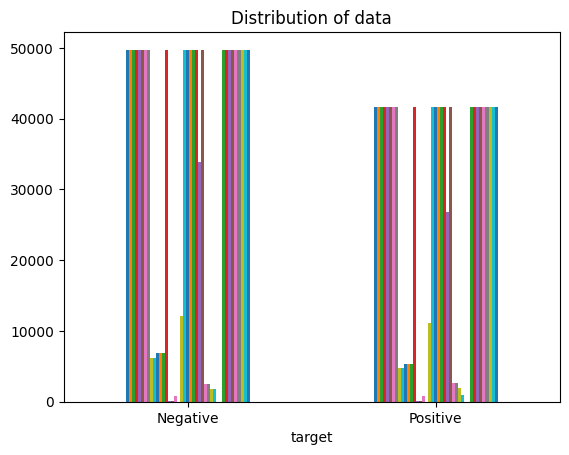

In [26]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['tweet_text_p']), list(df['target'])

In [27]:
# Print unique values of target variables
data=df[['tweet_text_p','target']]
data['target'].unique()

array([1, 0], dtype=int64)

In [28]:
# Separating positive and negative tweets

data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [29]:
# taking one fourth data so we can run on our machine easily

data_pos = data_pos.iloc[:int(30000)]
data_neg = data_neg.iloc[:int(30000)]

In [30]:
# Combining positive and negative tweets

dataset = pd.concat([data_pos, data_neg])

In [31]:
dataset

,tweet_text_p,target
0,RT : 24h round-up. A collection of TOP TWEETS....,1
2,RT : vr vrgotham 3dvideomotion This research p...,1
3,RT : This research paper investigates the use ...,1
4,RT : American drivers are more likely to a see...,1
7,This research paper investigates the use of fi...,1
...,...,...
57706,Oh I know. That’s not the route I’d go since ...,0
57708,Charged EVs | Geotab and Atom Power partner on...,0
57709,"Don't. First car, get the cheapest diesel. Th...",0
57710,RT : Despite global leaps towards the EV indus...,0


In [32]:
# Making statement text in lower case
dataset['text']=dataset['tweet_text_p']
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()


57706     oh i know. that’s not the route i’d go since ...
57708    charged evs | geotab and atom power partner on...
57709     don't. first car, get the cheapest diesel. th...
57710    rt : despite global leaps towards the ev indus...
57711      worse car? of c&amp;d's top evs this year, o...
Name: text, dtype: object

In [33]:
stopword = nltk.corpus.stopwords.words('english')

In [34]:
STOPWORDS = set(stopword)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

0    rt : 24h round-up. collection top tweets. enjo...
2    rt : vr vrgotham 3dvideomotion research paper ...
3    rt : research paper investigates use fixed roa...
4    rt : american drivers likely see benefit self ...
7    research paper investigates use fixed roadside...
Name: text, dtype: object

In [35]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

57706    oh know that’s route i’d go since gas way go u...
57708    charged evs  geotab atom power partner new ev ...
57709    dont first car get cheapest diesel study pollu...
57710    rt  despite global leaps towards ev industry s...
57711            worse car campds top evs year 2 top 10 s…
Name: text, dtype: object

In [36]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

57706    oh know that’s route i’d go since gas way go u...
57708    charged evs  geotab atom power partner new ev ...
57709    dont first car get cheapest diesel study pollu...
57710    rt  despite global leaps towards ev industry s...
57711             worse car campds top evs year 2 top10 s…
Name: text, dtype: object

In [37]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

57706    oh know that’s route i’d go since gas way go u...
57708    charged evs  geotab atom power partner new ev ...
57709    dont first car get cheapest diesel study pollu...
57710    rt  despite global leaps towards ev industry s...
57711             worse car campds top evs year 2 top10 s…
Name: text, dtype: object

In [38]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

57706    oh know that’s route i’d go since gas way go u...
57708    charged evs  geotab atom power partner new ev ...
57709    dont first car get cheapest diesel study pollu...
57710    rt  despite global leaps towards ev industry s...
57711                worse car campds top evs year  top s…
Name: text, dtype: object

In [39]:
from nltk.tokenize import sent_tokenize, word_tokenize 

def tokenizer(text):
    tokens = nltk.word_tokenize(text)
    return tokens

dataset['text'] = dataset['text'].apply(tokenizer)

In [40]:
dataset

,tweet_text_p,target,text
0,RT : 24h round-up. A collection of TOP TWEETS....,1,"[rt, h, roundup, collection, top, tweets, enjo..."
2,RT : vr vrgotham 3dvideomotion This research p...,1,"[rt, vr, vrgotham, dvideomotion, research, pap..."
3,RT : This research paper investigates the use ...,1,"[rt, research, paper, investigates, use, fixed..."
4,RT : American drivers are more likely to a see...,1,"[rt, american, drivers, likely, see, benefit, ..."
7,This research paper investigates the use of fi...,1,"[research, paper, investigates, use, fixed, ro..."
...,...,...,...
57706,Oh I know. That’s not the route I’d go since ...,0,"[oh, know, that, ’, s, route, i, ’, d, go, sin..."
57708,Charged EVs | Geotab and Atom Power partner on...,0,"[charged, evs, geotab, atom, power, partner, n..."
57709,"Don't. First car, get the cheapest diesel. Th...",0,"[dont, first, car, get, cheapest, diesel, stud..."
57710,RT : Despite global leaps towards the EV indus...,0,"[rt, despite, global, leaps, towards, ev, indu..."


In [41]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

0    [rt, h, roundup, collection, top, tweets, enjo...
2    [rt, vr, vrgotham, dvideomotion, research, pap...
3    [rt, research, paper, investigates, use, fixed...
4    [rt, american, drivers, likely, see, benefit, ...
7    [research, paper, investigates, use, fixed, ro...
Name: text, dtype: object

In [42]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

0    [rt, h, roundup, collection, top, tweets, enjo...
2    [rt, vr, vrgotham, dvideomotion, research, pap...
3    [rt, research, paper, investigates, use, fixed...
4    [rt, american, drivers, likely, see, benefit, ...
7    [research, paper, investigates, use, fixed, ro...
Name: text, dtype: object

In [43]:
# Separating input feature and label

X=df.text
y=df.target

In [44]:
# Splitting our data into Train and Test Subset
# Separating the 70% data for training data and 30% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state =26105111)


In [45]:
# Fit the TF-IDF Vectorizer

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

c:\users\dodlaraj\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


In [46]:
# Transform the data using TF-IDF Vectorizer

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [47]:

def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     14782
           1       0.91      0.75      0.82     12612

    accuracy                           0.85     27394
   macro avg       0.86      0.84      0.85     27394
weighted avg       0.86      0.85      0.85     27394



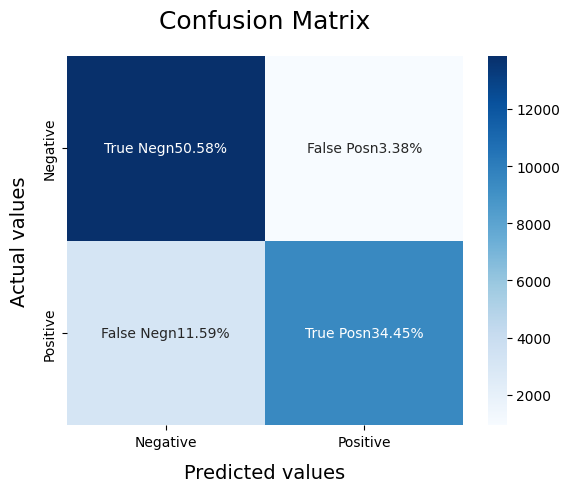

In [48]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

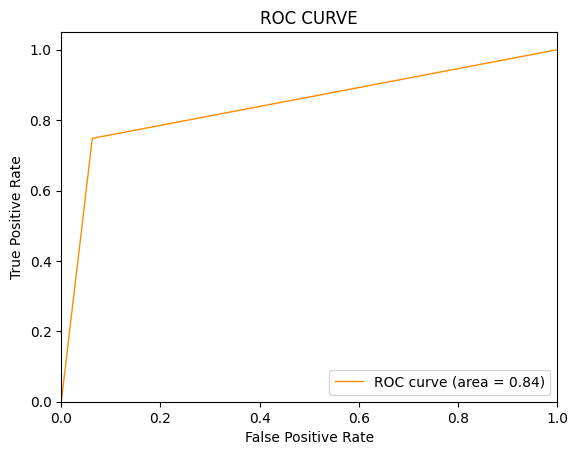

In [49]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     14782
           1       0.93      0.90      0.92     12612

    accuracy                           0.92     27394
   macro avg       0.92      0.92      0.92     27394
weighted avg       0.92      0.92      0.92     27394



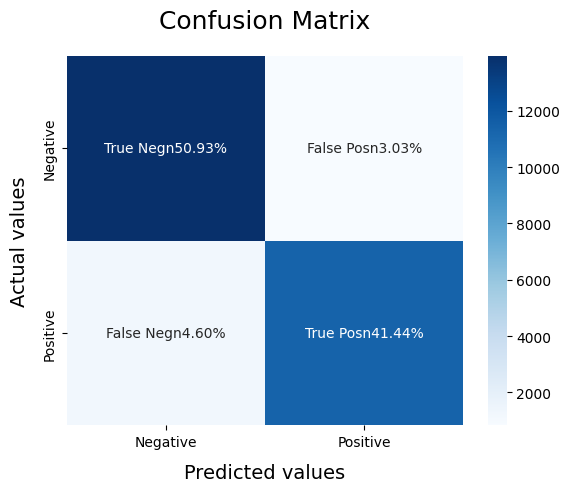

In [50]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

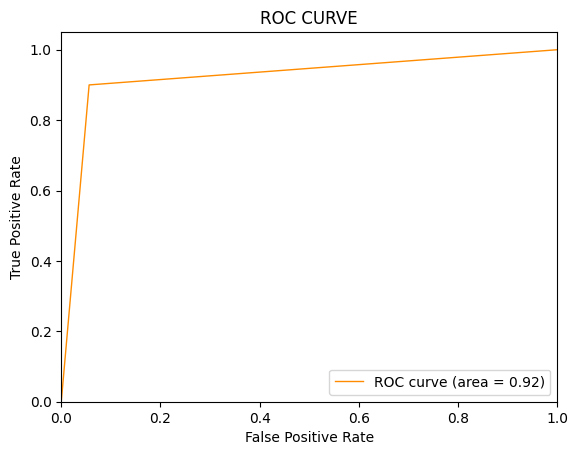

In [51]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     14782
           1       0.92      0.84      0.88     12612

    accuracy                           0.89     27394
   macro avg       0.90      0.89      0.89     27394
weighted avg       0.90      0.89      0.89     27394



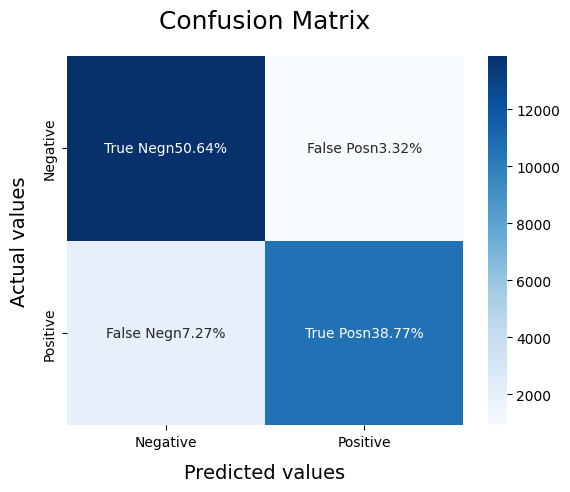

In [52]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

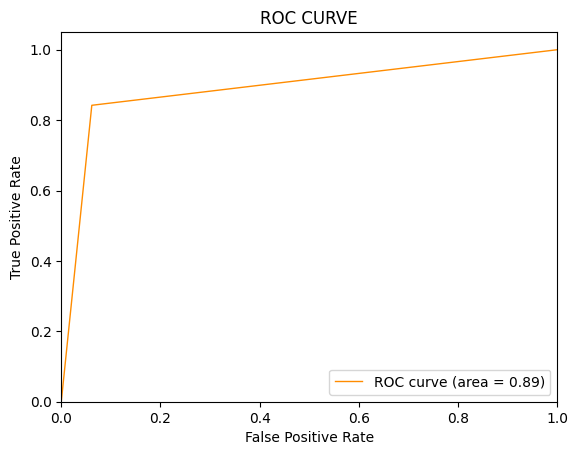

In [53]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [54]:
df.to_pickle('./sentiment_analysis_ML_results.pkl')